In [247]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [248]:
df = pd.read_csv('car data.csv')


In [249]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [250]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [252]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [253]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [254]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [255]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [256]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [257]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [258]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [259]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [260]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)

from sklearn.preprocessing import StandardScaler

#Standardize the columns in X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


df_scaled = pd.DataFrame(scaled_data, columns=X.columns, index=X.index)

X = df_scaled

In [261]:
y = df['Selling_Price']

In [262]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.128897,-0.236215,-0.256224,-0.500183,-0.737285,-0.39148,-0.174501
1,-0.217514,0.221505,0.155911,1.852241,-0.737285,-0.39148,-0.174501
2,1.168129,0.257427,-0.773969,-0.500183,-0.737285,-0.39148,-0.174501
3,-0.910335,-0.403079,-0.817758,-0.500183,-0.737285,-0.39148,-0.174501
4,0.128897,-0.087890,0.141743,1.852241,-0.737285,-0.39148,-0.174501
...,...,...,...,...,...,...,...
296,0.821718,0.460214,-0.076225,1.852241,-0.737285,-0.39148,-0.174501
297,0.475308,-0.200292,0.593804,-0.500183,-0.737285,-0.39148,-0.174501
298,-1.603156,0.390687,1.313340,-0.500183,-0.737285,-0.39148,-0.174501
299,1.168129,0.564504,-0.719876,1.852241,-0.737285,-0.39148,-0.174501


In [263]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [272]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [273]:
pred = model.predict(X_test)

In [274]:
pred

array([ 3.12014646,  8.25233281,  6.09135926, -1.45602499,  9.04591939,
        7.20705063,  1.41640397,  0.86885909,  1.49050471,  7.2365271 ,
        9.07565017,  0.5629711 ,  8.41576881,  3.6432358 ,  6.59152277,
        2.88633915,  0.41843056, 10.87640735,  1.92935588,  2.5353782 ,
        0.37331985,  7.96789412,  6.26813041,  2.40577882,  0.80841342,
        3.50189479,  5.12837742,  2.57390607,  2.32093045,  1.88498645,
        0.37271223])

In [275]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
9       7.45
118     1.10
154     0.50
164     0.45
33      6.00
5       9.25
116     1.10
45      7.50
173     0.40
230     6.15
46      2.65
124     0.95
97     17.00
158     0.48
101     1.70
168     0.42
267     8.35
240     5.35
25      3.00
144     0.60
246     3.75
251     5.00
73      2.65
109     1.20
108     1.20
137     0.65
Name: Selling_Price, dtype: float64

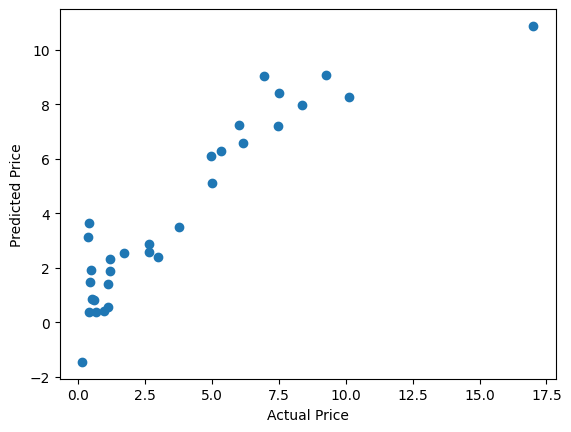

In [276]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [277]:
mae = metrics.mean_absolute_error(y_test, pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.027414039341791
